In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

### 1. Derive formula of $L_{2}(x)$ in terms of interpolation phase $ u = \frac{x - x_{i}}{h} $.  Integrate $ \hat{I}_{i}^{i+2}$ with received formula as integrand  [mathematical formula]. Usetimation time: ~30m

**Note** Use constant step $h = const$ and condition *number of segments is even* $n = 2k$

$L_2(x) = \frac{(x-x_{i+1})(x-x_{i+2})}{(x_i-x_{i+1})(x_i-x_{i+2})}f_i + \frac{(x-x_{i})(x-x_{i+2})}{(x_{i+1}-x_{i})(x_{i+1}-x_{i+2})}f_{i+1} + \frac{(x-x_{i})(x-x_{i+1})}{(x_{i+2}-x_{i})(x_{i+2}-x_{i+1})}f_{i+2}$

$u = \frac{x-x_i}{h} \rightarrow x-x_i = uh$

$x_{i+1} = x_i + h \rightarrow x-x_{i+1} = x-(x_i+h) = x-x_i-h = uh-h = h(u-1)$

$x_{i+2} = x_i + 2h \rightarrow x-x_{i+2} = x-(x_i+2h) = x-x_i-2h = uh-2h = h(u-2)$

$L_2(x) = \frac{h(u-1)h(u-2)}{-h*(-2h)}f_i + \frac{uh*h(u-2)}{h*(-h)}f_{i+1} + \frac{uh*h(u-1)}{2h*h}f_{i+2} = \frac{(u-1)(u-2)}{2}f_i - u(u-2)f_{i+1} + \frac{u(u-1)}{2}f_{i+2}$

$\hat{I}_{i}^{i+2} = \int_{x_i}^{x_{i+2}} L_2(x)dx$

$u = \frac{x-x_i}{h} = \frac{x_{i+2}-x_i}{h} = \frac{2h}{h} = 2$

$u = \frac{x-x_i}{h} = \frac{x_{i}-x_i}{h} = 0$

$du = \frac{dx}{h} \rightarrow dx = hdu$

$\hat{I}_{i}^{i+2} = \int_{0}^{2} [\frac{(u-1)(u-2)}{2}f_i - u(u-2)f_{i+1} + \frac{u(u-1)}{2}f_{i+2}]hdu = h[(\frac{u^3}{6} - \frac{3u^2}{4} + u)|_0^2 f_i - (\frac{u^3}{3}-u^2)|_0^2 f_{i+1} + (\frac{u^3}{6}-\frac{u^2}{4})|_0^2 f_{i+2}] = h[(\frac{8}{6} - \frac{12}{4} + 2)f_i - (\frac{8}{3} - 4)f_{i+1} + (\frac{8}{6} - \frac{4}{4})f_{i+2}] = \frac{hf_i}{3} + \frac{4hf_{i+1}}{3} + \frac{hf_{i+2}}{3} = \frac{h}{3}(f_i + 4f_{i+1} + f_{i+2})$

### 2. Explain how used condition $n = 2k$ helps us in integration. If we want to use odd number of segments we have to integrate with even number of segments but add the value $I_{n-1}^n$. What is the calculation accuracy order of $I_{n-1}^n$? Why? Explain both. [mathematical formula]. Usetimation time: ~30m

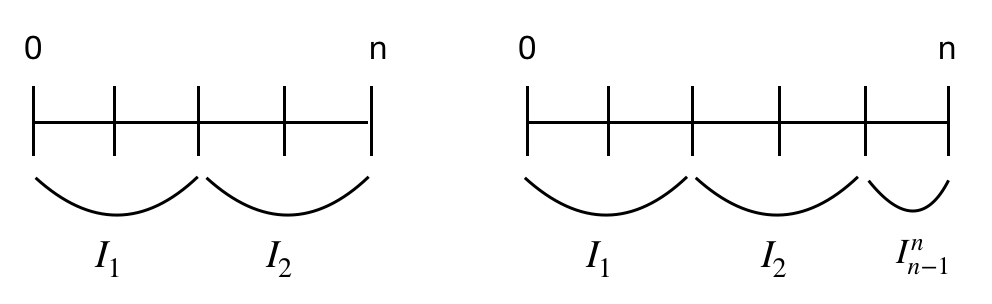

From the picture we can see how $n=2k$ condition (even case, 1st part of image) helps us and why do we need to add $I_{n-1}^n$ for cases when this condition is not met (odd case, 2nd part of image).

To get the calculation accuracy of $I_{n-1}^n$ we can calculate $\hat{I}_{n-3}^n$ using 3/8 Simpson's rule:

$\hat{I}_{n-3}^n = \frac{3h}{8}(f_{n-3} + 3f_{n-2} + 3f_{n-1} + f_{n})$ 

then calculate $\hat{I}_{n-3}^{n-1}$ using formula for $\hat{I}_i^{i+2}$:

$\hat{I}_{n-3}^{n-1} = \frac{h}{3}(f_{n-3} + 4f_{n-2} + f_{n-1})$

And by subtracting the second from the first we get $I_{n-1}^n$:

$I_{n-1}^n = \hat{I}_{n-3}^n - \hat{I}_{n-3}^{n-1} = \frac{3h}{8}(f_{n-3} + 3f_{n-2} + 3f_{n-1} + f_{n}) - \frac{h}{3}(f_{n-3} + 4f_{n-2} + f_{n-1}) = \frac{h}{24}(f_{n-3} - 5f_{n-2} + 19f_{n-1} + 9f_{n})$

So knowing that calculation accuracy of both Simpson's rule and 3/8 Simpson's rule is $O(h^5)$, we can say that calculation accuracy of $I_{n-1}^n$ (which is subtraction of those rules) is $O(h^5)$.

### 3. Derive the formula of whole $\hat{I}_{a}^{b}$. Summarize all integrals on segments $\hat{I}_{i}^{i+1}$ for even case, and for odd case. [mathematical formula]. Usetimation time: ~30m

**For even case:**

$\hat{I}_a^b = \sum_{i=0}^{n-2} \frac{h}{3}(f_i + 4f_{i+1} + f_{i+2})$

If we write down the first few elements of sum, we get:

$\hat{I}_a^b = \frac{h}{3}(f_0 + 4f_1 + f_2 + f_2 + 4f_3 + f_4 + f_4 + 4f_5 + f_6 + ... + f_n)$

We can see that $f$ with odd indexes have coefficient = 4 and $f$ with even indexes - 2. So:

$\hat{I}_a^b = \frac{h}{3}(f_0 + 4(f_1+f_3+...+f_{2k-1}) + 2(f_2+f_4+...+f_{2k-2})+f_n) = \frac{h}{3}(f_0 + 4\sum_{i=1}^{k}f_{2i-1} + 2\sum_{i=1}^{k-1}f_{2i} + f_{2k})$

**For odd case:**

$\hat{I}_{a}^{b} = \frac{h}{3}(f_0 + 4(f_1+f_3+...+f_{2k-1}) + 2(f_2+f_4+...+f_{2k-2})+f_n) = \frac{h}{3}(f_0 + 4\sum_{i=1}^{k}f_{2i-1} + 2\sum_{i=2}^{k}f_{2i} + f_{2k}) + \frac{h}{24}(f_{n-3} - 5f_{n-2} + 19f_{n-1} + 9f_{n})$

### 4. Derive the formula of trapezoid quadrature formula error estimation. Use Taylor series expansion for antiderivative $F_{i+1}$ and $f_{i+1}$  [mathematical formula] Usetimation time: ~30m

$I_i^{i+1} = F_{i+1} - F_i$

$\hat{I}_i^{i+1} = h_{i+1}\frac{f_i+f_{i+1}}{2}$

$I_i^{i+1} - \hat{I}_i^{i+1} = F_{i+1} - F_i - h_{i+1}\frac{f_i+f_{i+1}}{2} = F_i + h_{i+1}f_i + \frac{h_{i+1}^2}{2}f_i^{'} + \frac{h_{i+1}^3}{6}f^{''}(\xi_i) - F_i - \frac{h_{i+1}}{2}(f_i+f_i+h_{i+1}f_i^{'} + \frac{h_{i+1}^2}{2}f^{''}(\xi_i)) = \frac{h_{i+1}^3}{6}f^{''}(\xi_i) - \frac{h_{i+1}^3}{4}f^{''}(\xi_i) = -\frac{1}{12}h_{i+1}^3 f^{''}(\xi_i),$

$\xi_i \in (x_i, x_{i+1})$

$|I_i^{i+1} - \hat{I}_i^{i+1}| \leq \frac{M_{2,i}}{12}h_{i+1}^3,$

$M_{2,i} = \max_{[x_i, x_{i+1}]}|f^{''}(x)|$

### Congrats!